In [1]:
import sys
sys.path.append("/data1/andrew/meng/mixehr/meng/VAE-EHR/src")
import pandas as pd

import torch
from torch import nn, optim

In [2]:
import vae

from vae import VAE, VAETrainer
from icd_analysis_helper import ICDAnalysisHelper
from visualizer_helper import Visualizer

from config_reader import Config

In [3]:
###Load Configuration file
config = Config('./config.ini')
config.__dict__

{'patient_icd_path': '/data1/andrew/meng/mixehr/data/Mimic/andrew_outputs/PATIENT_ICD_BINARY.csv',
 'icd9codes_path': '/data1/andrew/meng/mixehr/data/Mimic/mimic-iii-clinical-database-1.4/D_ICD_DIAGNOSES.csv.gz',
 'experiment_name': '200114_patient_clusters_25_latent_dim_beta_vae',
 'encoder_dim': [(250, 500), (500, 250), (250, 100)],
 'latent_dim': 25,
 'decoder_dim': [],
 'use_relu': True,
 'kld_beta': 2.0}

In [4]:
###Load Data
patient_icd_df=pd.read_csv(config.patient_icd_path, sep=' ')
patient_icd_data = patient_icd_df.drop('SUBJECT_ID', axis=1)
data = torch.tensor(patient_icd_data.values).float()
print(data.shape)

icd9codes = pd.read_csv(config.icd9codes_path)
icd_analyzer = ICDAnalysisHelper(icd9codes_df = icd9codes, patient_icd_df = patient_icd_df)
#icd_analyzer.lookup_icds(icd9codes, ["4019", "41401"])

visualizer = Visualizer()

torch.Size([46520, 6984])


In [5]:
import math
from sklearn.model_selection import train_test_split

total_batches = 46520 / 40.0
train_batches = math.ceil(0.8 * total_batches)
val_batches = int(total_batches - train_batches)

train_datapoints = train_batches * 40
val_datapoints = val_batches * 40

splits = [train_batches/total_batches, val_batches/total_batches]
print(splits)

train_subset, val_subset = train_test_split(patient_icd_df, test_size = val_batches/total_batches)

train_data = train_subset.drop("SUBJECT_ID", axis=1)
val_data = val_subset.drop("SUBJECT_ID", axis=1)

train_data = torch.tensor(train_data.values).float()
val_data = torch.tensor(val_data.values).float()

[0.8005159071367154, 0.1994840928632846]


In [6]:
###Load Model
print("Feature_dim: {}".format(data.shape[1]))
model = VAE(
    feature_dim = data.shape[1], 
    encoder_dim = config.encoder_dim,
    latent_dim = config.latent_dim,
    decoder_dim = config.decoder_dim,
    use_relu= config.use_relu
)

optimizer = optim.Adam(model.parameters(), lr=0.001)
print(type(optimizer))

Feature_dim: 6984
<class 'torch.optim.adam.Adam'>


In [7]:
###Load Trainer
experiment_name=config.experiment_name
trainer = VAETrainer(
    model=model, 
    optimizer=optimizer,
    experiment_name=experiment_name,
    kld_beta=config.kld_beta
)

In [8]:
###Train Model
trainer.train(
    training_data=train_data,
    validation_data=val_data,
    epochs=80,
    batch_size=40,
    save_model_interval=5,
    clip_gradients=False
)

  0%|          | 0/931 [00:00<?, ?it/s]

Training with KLD Beta weight of 2.0


100%|██████████| 931/931 [00:06<00:00, 137.57it/s]


====> Epoch: 1 Average Training Loss: 15313.0095


  2%|▏         | 17/931 [00:00<00:05, 166.01it/s]

====> Epoch: 1 Average Validation Loss: 5268.0540


100%|██████████| 931/931 [00:07<00:00, 130.17it/s]


====> Epoch: 2 Average Training Loss: 4465.2047


  1%|▏         | 12/931 [00:00<00:07, 115.37it/s]

====> Epoch: 2 Average Validation Loss: 3937.0112


100%|██████████| 931/931 [00:08<00:00, 113.84it/s]


====> Epoch: 3 Average Training Loss: 3608.3480


  2%|▏         | 14/931 [00:00<00:06, 133.75it/s]

====> Epoch: 3 Average Validation Loss: 3377.4005


100%|██████████| 931/931 [00:06<00:00, 153.92it/s]


====> Epoch: 4 Average Training Loss: 3189.5792


  2%|▏         | 15/931 [00:00<00:06, 146.55it/s]

====> Epoch: 4 Average Validation Loss: 3071.3502


100%|██████████| 931/931 [00:07<00:00, 130.61it/s]


====> Epoch: 5 Average Training Loss: 2926.4281


  2%|▏         | 17/931 [00:00<00:05, 165.89it/s]

====> Epoch: 5 Average Validation Loss: 2841.2023


100%|██████████| 931/931 [00:06<00:00, 137.76it/s]


====> Epoch: 6 Average Training Loss: 2732.8425


  2%|▏         | 17/931 [00:00<00:05, 167.15it/s]

====> Epoch: 6 Average Validation Loss: 2671.0174


100%|██████████| 931/931 [00:05<00:00, 158.91it/s]


====> Epoch: 7 Average Training Loss: 2577.0989


  2%|▏         | 17/931 [00:00<00:05, 167.24it/s]

====> Epoch: 7 Average Validation Loss: 2545.3710


100%|██████████| 931/931 [00:05<00:00, 157.59it/s]


====> Epoch: 8 Average Training Loss: 2445.5529


  2%|▏         | 17/931 [00:00<00:05, 164.91it/s]

====> Epoch: 8 Average Validation Loss: 2413.8222


100%|██████████| 931/931 [00:06<00:00, 143.94it/s]


====> Epoch: 9 Average Training Loss: 2331.8087


  2%|▏         | 14/931 [00:00<00:06, 137.60it/s]

====> Epoch: 9 Average Validation Loss: 2306.8979


100%|██████████| 931/931 [00:06<00:00, 135.48it/s]


====> Epoch: 10 Average Training Loss: 2234.6152


  2%|▏         | 17/931 [00:00<00:05, 165.72it/s]

====> Epoch: 10 Average Validation Loss: 2218.6922


100%|██████████| 931/931 [00:08<00:00, 113.53it/s]


====> Epoch: 11 Average Training Loss: 2153.0406


  2%|▏         | 17/931 [00:00<00:05, 165.31it/s]

====> Epoch: 11 Average Validation Loss: 2147.2842


100%|██████████| 931/931 [00:05<00:00, 157.04it/s]


====> Epoch: 12 Average Training Loss: 2084.7718


  2%|▏         | 17/931 [00:00<00:05, 165.15it/s]

====> Epoch: 12 Average Validation Loss: 2085.5710


100%|██████████| 931/931 [00:07<00:00, 131.43it/s]


====> Epoch: 13 Average Training Loss: 2028.6888


  1%|▏         | 13/931 [00:00<00:07, 129.92it/s]

====> Epoch: 13 Average Validation Loss: 2035.8547


100%|██████████| 931/931 [00:08<00:00, 111.34it/s]


====> Epoch: 14 Average Training Loss: 1980.2315


  1%|          | 11/931 [00:00<00:08, 105.96it/s]

====> Epoch: 14 Average Validation Loss: 1997.4293


100%|██████████| 931/931 [00:06<00:00, 135.48it/s]


====> Epoch: 15 Average Training Loss: 1939.4564


  2%|▏         | 17/931 [00:00<00:05, 165.53it/s]

====> Epoch: 15 Average Validation Loss: 1961.7551


100%|██████████| 931/931 [00:07<00:00, 129.58it/s]


====> Epoch: 16 Average Training Loss: 1904.8181


  1%|▏         | 13/931 [00:00<00:07, 127.09it/s]

====> Epoch: 16 Average Validation Loss: 1934.0667


100%|██████████| 931/931 [00:05<00:00, 155.69it/s]


====> Epoch: 17 Average Training Loss: 1874.6991


  2%|▏         | 14/931 [00:00<00:06, 135.22it/s]

====> Epoch: 17 Average Validation Loss: 1911.9536


100%|██████████| 931/931 [00:05<00:00, 161.46it/s]


====> Epoch: 18 Average Training Loss: 1848.9305


  2%|▏         | 17/931 [00:00<00:05, 166.70it/s]

====> Epoch: 18 Average Validation Loss: 1888.8812


100%|██████████| 931/931 [00:09<00:00, 100.16it/s]


====> Epoch: 19 Average Training Loss: 1826.3837


  1%|▏         | 12/931 [00:00<00:07, 119.83it/s]

====> Epoch: 19 Average Validation Loss: 1873.8909


100%|██████████| 931/931 [00:09<00:00, 100.70it/s]


====> Epoch: 20 Average Training Loss: 1805.3825


  1%|▏         | 13/931 [00:00<00:07, 128.68it/s]

====> Epoch: 20 Average Validation Loss: 1856.4635


100%|██████████| 931/931 [00:09<00:00, 99.56it/s] 


====> Epoch: 21 Average Training Loss: 1786.7696


  1%|▏         | 12/931 [00:00<00:08, 114.57it/s]

====> Epoch: 21 Average Validation Loss: 1845.2227


100%|██████████| 931/931 [00:09<00:00, 98.83it/s] 


====> Epoch: 22 Average Training Loss: 1771.0823


  1%|▏         | 12/931 [00:00<00:08, 111.51it/s]

====> Epoch: 22 Average Validation Loss: 1830.9074


100%|██████████| 931/931 [00:09<00:00, 101.38it/s]


====> Epoch: 23 Average Training Loss: 1755.3843


  2%|▏         | 15/931 [00:00<00:06, 143.55it/s]

====> Epoch: 23 Average Validation Loss: 1821.1543


100%|██████████| 931/931 [00:08<00:00, 110.05it/s]


====> Epoch: 24 Average Training Loss: 1740.9219


  1%|▏         | 12/931 [00:00<00:07, 118.67it/s]

====> Epoch: 24 Average Validation Loss: 1810.3141


100%|██████████| 931/931 [00:07<00:00, 128.60it/s]


====> Epoch: 25 Average Training Loss: 1727.4187


  2%|▏         | 17/931 [00:00<00:05, 164.20it/s]

====> Epoch: 25 Average Validation Loss: 1799.8881


100%|██████████| 931/931 [00:08<00:00, 116.32it/s]


====> Epoch: 26 Average Training Loss: 1715.1201


  1%|▏         | 12/931 [00:00<00:07, 118.84it/s]

====> Epoch: 26 Average Validation Loss: 1794.4979


100%|██████████| 931/931 [00:06<00:00, 141.19it/s]


====> Epoch: 27 Average Training Loss: 1704.1193


  1%|          | 11/931 [00:00<00:08, 105.90it/s]

====> Epoch: 27 Average Validation Loss: 1788.1571


100%|██████████| 931/931 [00:06<00:00, 136.07it/s]


====> Epoch: 28 Average Training Loss: 1693.5827


  1%|▏         | 13/931 [00:00<00:07, 126.15it/s]

====> Epoch: 28 Average Validation Loss: 1794.6133


100%|██████████| 931/931 [00:09<00:00, 97.36it/s] 


====> Epoch: 29 Average Training Loss: 1683.1778


  1%|          | 11/931 [00:00<00:08, 109.90it/s]

====> Epoch: 29 Average Validation Loss: 1780.3105


100%|██████████| 931/931 [00:07<00:00, 132.59it/s]


====> Epoch: 30 Average Training Loss: 1673.7317


  2%|▏         | 14/931 [00:00<00:06, 132.76it/s]

====> Epoch: 30 Average Validation Loss: 1767.6543


100%|██████████| 931/931 [00:06<00:00, 144.56it/s]


====> Epoch: 31 Average Training Loss: 1664.0713


  1%|▏         | 13/931 [00:00<00:07, 123.98it/s]

====> Epoch: 31 Average Validation Loss: 1760.2845


100%|██████████| 931/931 [00:09<00:00, 99.34it/s] 


====> Epoch: 32 Average Training Loss: 1655.8087


  1%|▏         | 13/931 [00:00<00:07, 124.90it/s]

====> Epoch: 32 Average Validation Loss: 1752.5667


100%|██████████| 931/931 [00:08<00:00, 113.46it/s]


====> Epoch: 33 Average Training Loss: 1646.1966


  2%|▏         | 14/931 [00:00<00:07, 123.27it/s]

====> Epoch: 33 Average Validation Loss: 1745.0260


100%|██████████| 931/931 [00:06<00:00, 134.04it/s]


====> Epoch: 34 Average Training Loss: 1638.2349


  2%|▏         | 17/931 [00:00<00:05, 167.62it/s]

====> Epoch: 34 Average Validation Loss: 1746.3637


100%|██████████| 931/931 [00:08<00:00, 106.54it/s]


====> Epoch: 35 Average Training Loss: 1629.7186


  2%|▏         | 14/931 [00:00<00:06, 137.15it/s]

====> Epoch: 35 Average Validation Loss: 1751.5691


100%|██████████| 931/931 [00:07<00:00, 126.16it/s]


====> Epoch: 36 Average Training Loss: 1622.4719


  1%|▏         | 12/931 [00:00<00:07, 118.05it/s]

====> Epoch: 36 Average Validation Loss: 1736.0407


100%|██████████| 931/931 [00:08<00:00, 106.44it/s]


====> Epoch: 37 Average Training Loss: 1614.6905


  1%|▏         | 13/931 [00:00<00:07, 121.37it/s]

====> Epoch: 37 Average Validation Loss: 1721.8639


100%|██████████| 931/931 [00:09<00:00, 102.34it/s]


====> Epoch: 38 Average Training Loss: 1607.0712


  1%|▏         | 12/931 [00:00<00:07, 117.57it/s]

====> Epoch: 38 Average Validation Loss: 1716.0385


100%|██████████| 931/931 [00:09<00:00, 101.67it/s]


====> Epoch: 39 Average Training Loss: 1599.1512


  1%|▏         | 13/931 [00:00<00:07, 120.77it/s]

====> Epoch: 39 Average Validation Loss: 1710.8913


100%|██████████| 931/931 [00:08<00:00, 115.47it/s]


====> Epoch: 40 Average Training Loss: 1591.4812


  1%|          | 10/931 [00:00<00:09, 94.83it/s]

====> Epoch: 40 Average Validation Loss: 1706.6210


100%|██████████| 931/931 [00:06<00:00, 149.25it/s]


====> Epoch: 41 Average Training Loss: 1584.1214


  2%|▏         | 16/931 [00:00<00:05, 155.63it/s]

====> Epoch: 41 Average Validation Loss: 1710.6093


100%|██████████| 931/931 [00:06<00:00, 139.38it/s]


====> Epoch: 42 Average Training Loss: 1577.9523


  1%|▏         | 12/931 [00:00<00:08, 107.83it/s]

====> Epoch: 42 Average Validation Loss: 1700.3905


100%|██████████| 931/931 [00:08<00:00, 112.33it/s]


====> Epoch: 43 Average Training Loss: 1571.7882


  2%|▏         | 17/931 [00:00<00:05, 160.36it/s]

====> Epoch: 43 Average Validation Loss: 1697.3719


100%|██████████| 931/931 [00:07<00:00, 118.81it/s]


====> Epoch: 44 Average Training Loss: 1565.6981


  1%|▏         | 12/931 [00:00<00:08, 110.56it/s]

====> Epoch: 44 Average Validation Loss: 1692.8852


100%|██████████| 931/931 [00:10<00:00, 91.90it/s] 


====> Epoch: 45 Average Training Loss: 1559.5055


  1%|▏         | 12/931 [00:00<00:07, 119.12it/s]

====> Epoch: 45 Average Validation Loss: 1692.7121


100%|██████████| 931/931 [00:08<00:00, 104.95it/s]


====> Epoch: 46 Average Training Loss: 1553.2626


  1%|          | 8/931 [00:00<00:12, 76.91it/s]

====> Epoch: 46 Average Validation Loss: 1687.4063


100%|██████████| 931/931 [00:08<00:00, 103.77it/s]


====> Epoch: 47 Average Training Loss: 1548.3423


  2%|▏         | 17/931 [00:00<00:05, 168.62it/s]

====> Epoch: 47 Average Validation Loss: 1682.7440


100%|██████████| 931/931 [00:07<00:00, 117.98it/s]


====> Epoch: 48 Average Training Loss: 1542.2381


  2%|▏         | 16/931 [00:00<00:05, 156.29it/s]

====> Epoch: 48 Average Validation Loss: 1677.9579


100%|██████████| 931/931 [00:06<00:00, 134.83it/s]


====> Epoch: 49 Average Training Loss: 1537.9090


  2%|▏         | 14/931 [00:00<00:06, 131.98it/s]

====> Epoch: 49 Average Validation Loss: 1674.6508


100%|██████████| 931/931 [00:07<00:00, 132.19it/s]


====> Epoch: 50 Average Training Loss: 1532.1829


  1%|▏         | 13/931 [00:00<00:07, 127.87it/s]

====> Epoch: 50 Average Validation Loss: 1669.1139


100%|██████████| 931/931 [00:08<00:00, 106.47it/s]


====> Epoch: 51 Average Training Loss: 1527.5025


  1%|▏         | 12/931 [00:00<00:07, 116.99it/s]

====> Epoch: 51 Average Validation Loss: 1670.8714


100%|██████████| 931/931 [00:07<00:00, 119.79it/s]


====> Epoch: 52 Average Training Loss: 1523.2171


  2%|▏         | 14/931 [00:00<00:06, 132.27it/s]

====> Epoch: 52 Average Validation Loss: 1665.8078


100%|██████████| 931/931 [00:09<00:00, 95.78it/s] 


====> Epoch: 53 Average Training Loss: 1519.8075


  1%|▏         | 13/931 [00:00<00:07, 123.49it/s]

====> Epoch: 53 Average Validation Loss: 1667.5205


100%|██████████| 931/931 [00:08<00:00, 110.04it/s]


====> Epoch: 54 Average Training Loss: 1515.3389


  2%|▏         | 15/931 [00:00<00:06, 143.75it/s]

====> Epoch: 54 Average Validation Loss: 1660.0384


100%|██████████| 931/931 [00:09<00:00, 98.16it/s] 


====> Epoch: 55 Average Training Loss: 1511.7209


  2%|▏         | 17/931 [00:00<00:05, 166.63it/s]

====> Epoch: 55 Average Validation Loss: 1660.5773


100%|██████████| 931/931 [00:06<00:00, 154.85it/s]


====> Epoch: 56 Average Training Loss: 1507.6362


  2%|▏         | 14/931 [00:00<00:06, 132.34it/s]

====> Epoch: 56 Average Validation Loss: 1659.0431


100%|██████████| 931/931 [00:09<00:00, 98.75it/s] 


====> Epoch: 57 Average Training Loss: 1503.4929


  1%|          | 10/931 [00:00<00:09, 92.52it/s]

====> Epoch: 57 Average Validation Loss: 1654.7373


100%|██████████| 931/931 [00:08<00:00, 107.24it/s]


====> Epoch: 58 Average Training Loss: 1499.4097


  1%|▏         | 13/931 [00:00<00:07, 129.09it/s]

====> Epoch: 58 Average Validation Loss: 1649.6578


100%|██████████| 931/931 [00:09<00:00, 102.02it/s]


====> Epoch: 59 Average Training Loss: 1495.5598


  1%|          | 10/931 [00:00<00:10, 91.32it/s]

====> Epoch: 59 Average Validation Loss: 1650.8697


100%|██████████| 931/931 [00:09<00:00, 103.39it/s]


====> Epoch: 60 Average Training Loss: 1492.0534


  1%|▏         | 13/931 [00:00<00:07, 122.04it/s]

====> Epoch: 60 Average Validation Loss: 1648.8630


100%|██████████| 931/931 [00:08<00:00, 108.13it/s]


====> Epoch: 61 Average Training Loss: 1488.4693


  2%|▏         | 16/931 [00:00<00:05, 154.38it/s]

====> Epoch: 61 Average Validation Loss: 1650.5609


100%|██████████| 931/931 [00:06<00:00, 146.56it/s]


====> Epoch: 62 Average Training Loss: 1484.8027


  2%|▏         | 15/931 [00:00<00:06, 142.92it/s]

====> Epoch: 62 Average Validation Loss: 1641.0643


100%|██████████| 931/931 [00:08<00:00, 115.47it/s]


====> Epoch: 63 Average Training Loss: 1481.1922


  1%|          | 10/931 [00:00<00:09, 97.59it/s]

====> Epoch: 63 Average Validation Loss: 1638.6992


100%|██████████| 931/931 [00:09<00:00, 100.53it/s]


====> Epoch: 64 Average Training Loss: 1476.7049


  1%|▏         | 12/931 [00:00<00:07, 117.92it/s]

====> Epoch: 64 Average Validation Loss: 1636.3598


100%|██████████| 931/931 [00:09<00:00, 101.59it/s]


====> Epoch: 65 Average Training Loss: 1473.6025


  1%|▏         | 12/931 [00:00<00:07, 115.08it/s]

====> Epoch: 65 Average Validation Loss: 1635.2602


100%|██████████| 931/931 [00:08<00:00, 107.14it/s]


====> Epoch: 66 Average Training Loss: 1470.2245


  1%|▏         | 12/931 [00:00<00:07, 117.52it/s]

====> Epoch: 66 Average Validation Loss: 1631.9349


100%|██████████| 931/931 [00:08<00:00, 109.00it/s]


====> Epoch: 67 Average Training Loss: 1467.3552


  1%|▏         | 12/931 [00:00<00:07, 119.51it/s]

====> Epoch: 67 Average Validation Loss: 1635.8430


100%|██████████| 931/931 [00:09<00:00, 99.70it/s] 


====> Epoch: 68 Average Training Loss: 1464.5663


  1%|▏         | 12/931 [00:00<00:07, 117.66it/s]

====> Epoch: 68 Average Validation Loss: 1631.8240


100%|██████████| 931/931 [00:08<00:00, 105.59it/s]


====> Epoch: 69 Average Training Loss: 1461.3310


  1%|          | 10/931 [00:00<00:10, 90.52it/s]

====> Epoch: 69 Average Validation Loss: 1630.2477


100%|██████████| 931/931 [00:09<00:00, 103.20it/s]


====> Epoch: 70 Average Training Loss: 1459.0012


  1%|          | 11/931 [00:00<00:09, 101.33it/s]

====> Epoch: 70 Average Validation Loss: 1625.8224


100%|██████████| 931/931 [00:07<00:00, 130.11it/s]


====> Epoch: 71 Average Training Loss: 1455.1217


  1%|▏         | 13/931 [00:00<00:07, 128.96it/s]

====> Epoch: 71 Average Validation Loss: 1627.2521


100%|██████████| 931/931 [00:08<00:00, 110.49it/s]


====> Epoch: 72 Average Training Loss: 1452.7506


  1%|          | 8/931 [00:00<00:11, 77.46it/s]

====> Epoch: 72 Average Validation Loss: 1640.3682


100%|██████████| 931/931 [00:08<00:00, 111.22it/s]


====> Epoch: 73 Average Training Loss: 1450.4960


  1%|▏         | 13/931 [00:00<00:07, 120.99it/s]

====> Epoch: 73 Average Validation Loss: 1626.2015


100%|██████████| 931/931 [00:08<00:00, 106.61it/s]


====> Epoch: 74 Average Training Loss: 1446.6921


  2%|▏         | 15/931 [00:00<00:06, 140.83it/s]

====> Epoch: 74 Average Validation Loss: 1628.1630


100%|██████████| 931/931 [00:09<00:00, 96.47it/s] 


====> Epoch: 75 Average Training Loss: 1444.0794


  1%|▏         | 13/931 [00:00<00:07, 126.33it/s]

====> Epoch: 75 Average Validation Loss: 1623.8572


100%|██████████| 931/931 [00:07<00:00, 128.24it/s]


====> Epoch: 76 Average Training Loss: 1441.5250


  2%|▏         | 17/931 [00:00<00:05, 167.53it/s]

====> Epoch: 76 Average Validation Loss: 1621.1784


100%|██████████| 931/931 [00:09<00:00, 99.90it/s] 


====> Epoch: 77 Average Training Loss: 1438.0755


  1%|          | 9/931 [00:00<00:10, 87.82it/s]

====> Epoch: 77 Average Validation Loss: 1616.2497


100%|██████████| 931/931 [00:09<00:00, 97.41it/s] 


====> Epoch: 78 Average Training Loss: 1434.9744


  1%|          | 11/931 [00:00<00:08, 109.42it/s]

====> Epoch: 78 Average Validation Loss: 1618.0604


100%|██████████| 931/931 [00:06<00:00, 133.80it/s]


====> Epoch: 79 Average Training Loss: 1432.4894


  2%|▏         | 17/931 [00:00<00:05, 167.24it/s]

====> Epoch: 79 Average Validation Loss: 1616.2638


100%|██████████| 931/931 [00:06<00:00, 152.11it/s]


====> Epoch: 80 Average Training Loss: 1429.8514
====> Epoch: 80 Average Validation Loss: 1618.5143


In [ ]:
###Load pre-trained model
epoch = 40
model.load_state_dict(torch.load("./VAE_exp_{}_epoch_{}.pkl".format(experiment_name, epoch)))
trainer.model = model

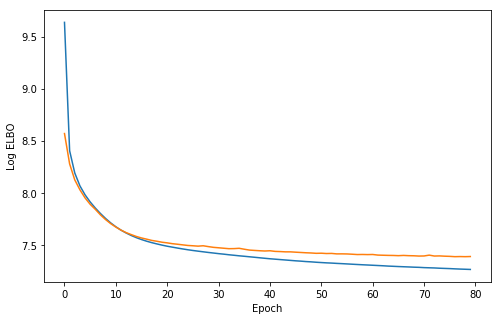

In [9]:
trainer.plot_elbo()

In [ ]:
###Encode data
latent, means, var = trainer.encode_data(data)

In [ ]:
###Get UMAP representations
X_umap = visualizer.umap_embedding(latent.cpu().detach().numpy())
X_umap_means = visualizer.umap_embedding(means.cpu().detach().numpy())
X_umap_vars = visualizer.umap_embedding(var.cpu().detach().numpy())

In [ ]:
###Plot UMAP representations
heart_keywords = ['heart', 'atrial', 'coronary', 'hypertension', 'vascular']
heart_patient_idxs = icd_analyzer.get_patients_idxs_with_disease_keywords(substrings=heart_keywords, case_sensitive=False)
heart_colors = np.array([0 for i in range(X_umap.shape[0])])
heart_colors[heart_patient_idxs] = 100

visualizer.plot2d(
    X=X_umap, 
    filename="Patient_Clusters_exp_{}_epoch_{}{}".format(experiment_name, epoch, "_heart_umap"), 
    colors=heart_colors,
)
visualizer.plot2d(
    X=X_umap_means, 
    filename="Patient_Clusters_exp_{}_epoch_{}{}".format(experiment_name, epoch, "_heart_umap_means"), 
    colors=heart_colors,
)
visualizer.plot2d(
    X=X_umap_vars, 
    filename="Patient_Clusters_exp_{}_epoch_{}{}".format(experiment_name, epoch, "_heart_umap_vars"), 
    colors=heart_colors,
)

In [ ]:
###Additional Visualizations
baby_keywords = ['congenital', 'infant', 'newborn', 'neonatal', 'born', 'birth']
baby_patient_idxs = icd_analyzer.get_patients_idxs_with_disease_keywords(substrings=baby_keywords, case_sensitive=False)

baby_heart_colors = np.array([0 for i in range(X_umap.shape[0])])
baby_heart_colors[heart_patient_idxs] = 100
baby_heart_colors[baby_patient_idxs] = 50

visualizer.plot2d(X_umap, "Patient_Clusters_exp_{}_epoch_{}{}".format(experiment_name, epoch, "_baby_heart_umap"), colors=baby_heart_colors)

In [ ]:
X_umap_3d = visualizer.umap_embedding(latent.cpu().detach().numpy(), n_components=3)

visualizer.plot3d(
    X=X_umap_3d, 
    filename="Patient_Clusters_exp_{}_epoch_{}{}".format(experiment_name, epoch, "_heart_umap_3D"), 
    colors=baby_heart_colors,
)